<a href="https://colab.research.google.com/github/prakash22031997/SPARK-FOUNDATION-TASK-2/blob/main/spark_foundation_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Spark Foundation : Data Science and Business Analytics Internship**

Task 2 : Prediction using Unsupervised ML
in this task I'm predicting the optimum number of clusters using Iris dataset

**Project By : PRAKASH CHOUBEY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
dataset = pd.read_csv("Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **Data Visualization**


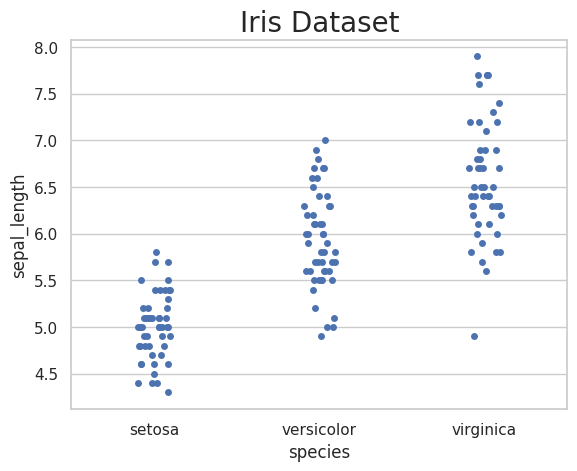

In [ ]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x = 'species', y = 'sepal_length', data = iris, size = 5);
plt.title('Iris Dataset', fontsize = 20)
plt.show()

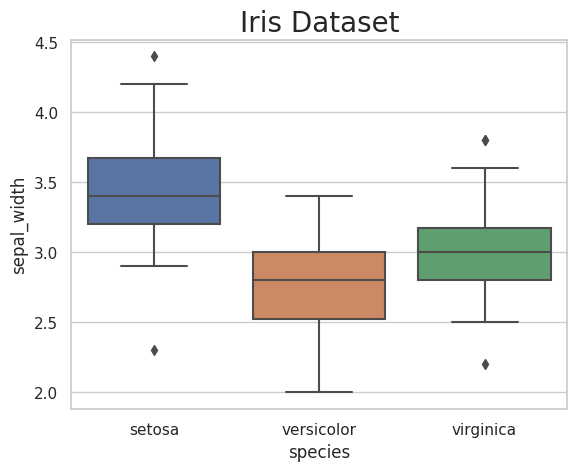

In [ ]:
sns.boxplot(x = 'species', y = 'sepal_width', data = iris)
plt.title('Iris Dataset', size = 20)
plt.show()

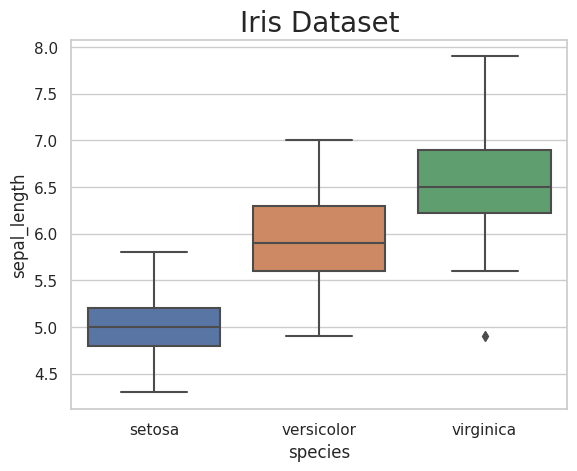

In [ ]:
sns.boxplot(x='species', y='sepal_length',data=iris)
plt.title('Iris Dataset', size=20)
plt.show()

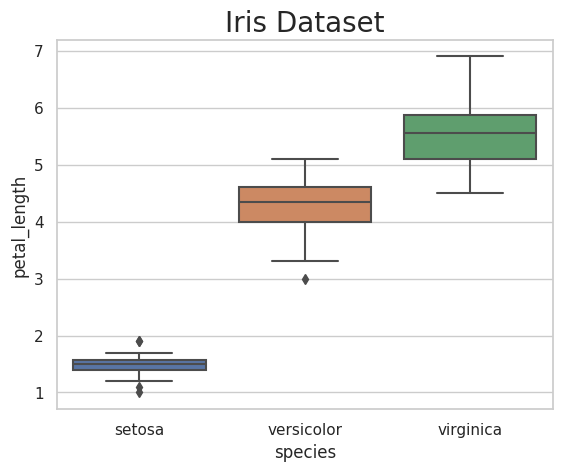

In [ ]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title("Iris Dataset",size=20)
plt.show()

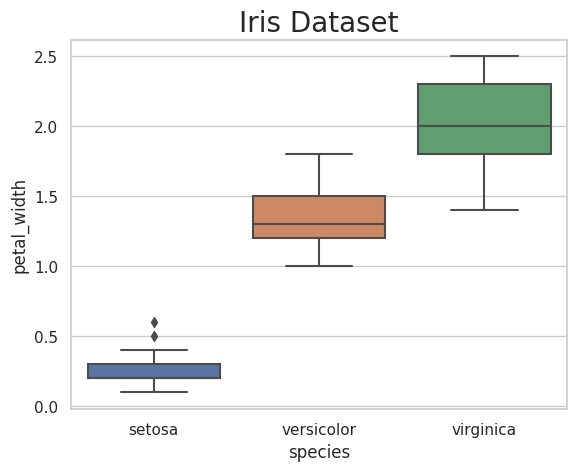

In [ ]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title("Iris Dataset",size=20)
plt.show()

<ipython-input-17-601013981fdd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot= True , cmap= 'RdYlGn', linewidths=.5)


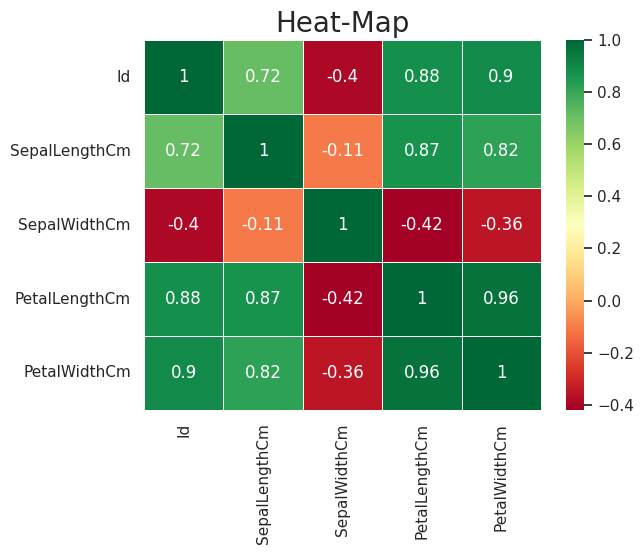

In [ ]:
#This is required for analysis of two variables for determining the emperical relationship b/w them

sns.heatmap(dataset.corr(), annot= True , cmap= 'RdYlGn', linewidths=.5)
plt.title('Heat-Map',size=20)
plt.show()

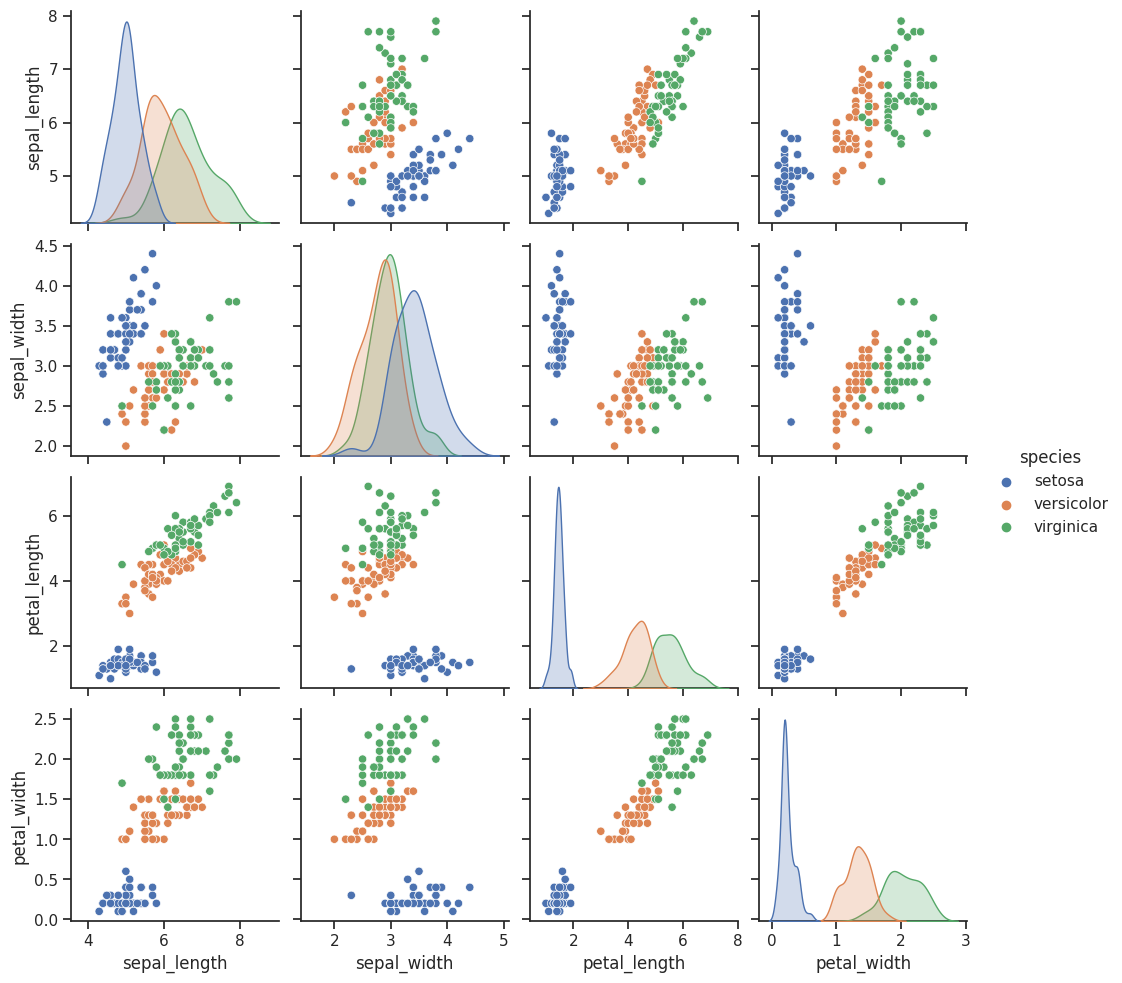

In [ ]:
sns.set(style='ticks', color_codes= True)
iris = sns.load_dataset('iris')
g = sns.pairplot(iris, hue= 'species')
plt.show()

## **finding the optimum number of clusters for k-means classification**

In [ ]:
from sklearn.cluster import KMeans
x = dataset.iloc[:,[0,1,2,3]].values
WCSS = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init= "k-means++",
                  max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  WCSS.append(kmeans.inertia_)

Plotting the result onto a line graph and it allowing us to observe "THE ELBOW"

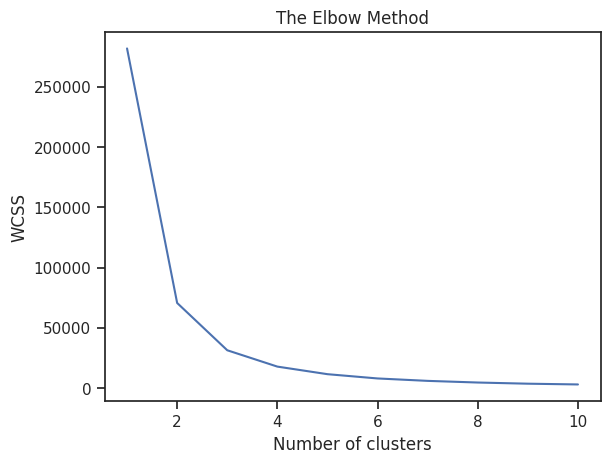

In [ ]:
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Applying k-means dataset/creating the k-means classifier

In [ ]:
kmeans = KMeans(n_clusters = 3, init='k-means++',
                max_iter= 300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

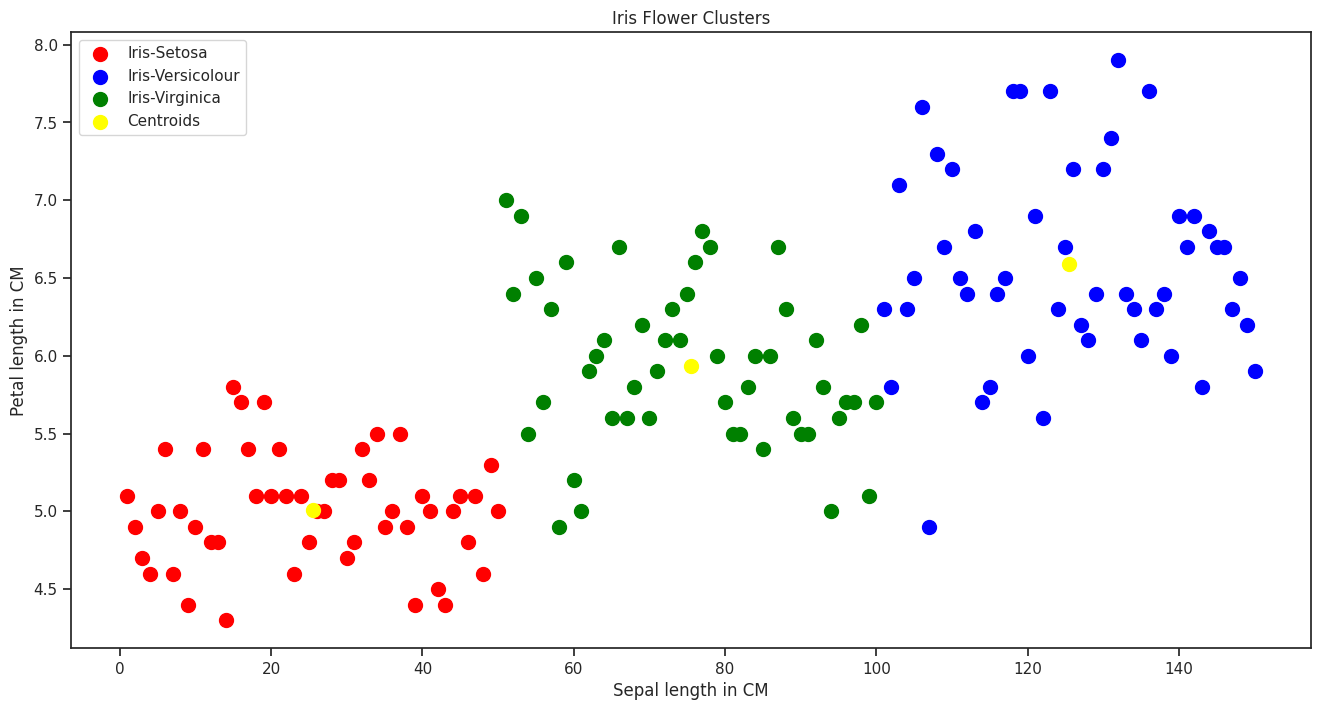

In [ ]:
# Visualising the clusters - on the first two columns

plt.figure(figsize=(16,8))
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans==0,1],s=100, c = 'red',label='Iris-Setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans==1,1],s=100, c = 'blue',label='Iris-Versicolour')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans==2,1],s=100, c = 'green',label='Iris-Virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s =100, c= 'yellow', label ='Centroids')

plt.title("K-Means")
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal length in CM')
plt.ylabel('Petal length in CM')
plt.legend()
plt.show()